Proyecto Final - Data Scientist Coderhouse
Emilse Bover

*La producción de pollos parrilleros en Argentina se encuentra concentrada en unas pocas empresas y la mayoría de ellas son de tipo familiar. Las más grandes realizan todos los procesos de la cadena de producción: desde las cabañas de la genética (Abuelos) hasta la distribución en los puntos finales del producto terminado: cadenas de supermercados, minoristas, consumidor directo y puertos (productos de exportación).Los pollos parrilleros se crían en granjas conformadas por galpones en los que se ingresan los animales recién nacidos (pollitos BB), las empresas productoras proveen todos los insumos necesarios para la crianza (alimento, medicamentos, desinfectantes, material de cama, servicios de limpieza, entre otros) y el encargado o dueño de la granja (integrado) se ocupa del manejo de las aves y su ambiente (provisión de agua, alimento, condiciones de temperatura y humedad, etc.). La duración del ciclo de crianza es de aproximadamente 48 días y el peso final de alrededor de 2.8 Kilos. La empresa productora retira los animales para llevarlos al frigorífico. 
La producción se analiza en función de la eficiencia productiva de cada crianza. Una mayor eficiencia significa lograr un animal de mayor peso con el menor consumo de alimento posible ya que el alimento constituye aproximadamente el 70% del costo de producción. La relación alimento consumido/peso final logrado es la conversión alimenticia. El impacto de la mortalidad es negativo y es creciente con la edad: a mayor edad, más cantidad de alimento habrá consumido sin producir kilos.*
*La edad a faena está condicionada por la demanda del sector de ventas: tamaño de las aves, cantidad de kilos; por el ritmo de crecimiento (ganancia media diaria de peso) y por las condiciones sanitarias (enfermedades).
El valor de conversión como indicador productivo tiene la limitación de que no puede ser utilizado para comparar resultados entre granjas y períodos de tiempo por depender de la edad, el peso final y la mortalidad.
Debido a ello se utilizan otros parámetros como la ganancia media diaria de peso (A.D.), la conversión ajustada a un peso teórico (Conversión aj. a 2.7 kg) y la relación Peso/Conversión.*

*El resultado productivo será la resultante de la interacción de los siguientes factores:
•La genética: La línea genética de las aves, el origen y edad de los reproductores (padres), el tipo de huevo que dio origen a los pollitos BB.
•La nutrición: La composición de la dieta, la calidad de las materias primas utilizadas.
•El ambiente: El tipo de galpón de crianza (convencional, ambiente controlado), las condiciones de temperatura y humedad y la disponibilidad de recursos: comederos, bebederos, ventiladores, etc.
•La sanidad: Planes de vacunación y salud intestinal, medicaciones, lavado y desinfección, aplicación de medidas de bioseguridad, etc.
El planteo del presente trabajo es analizar los diferentes factores que impactan sobre los resultados de ganancia media diaria de peso y sugerir acciones de manejo para mejorar los valores de este indicador productivo.*

**Definición de objetivo**
El objetivo del presente trabajo es detectar el impacto de los factores que afectan al crecimiento de los pollos parrilleros para tomar decisiones que mejoren los resultados productivos. 

**Contexto comercial**
El retorno económico de la empresa productora de pollos parrilleros depende de la obtención de mejores resultados productivos. A mayor ganancia de peso diaria, por ejemplo, el consumo total de alimento será menor disminuyendo el costo. Otro impacto positivo del aumento de la ganancia de peso diaria es que se reduce la edad a faena de los animales ya que se alcanza el peso deseado en menor cantidad de días. Esta reducción de días permite: liberación de superficie de producción (metros cuadrados de galpón, rotación), menor propensión a sufrir enfermedades y accidentes (por ejemplo cortes de luz). También el dueño de la granja tiene menores costos de luz y gas y por lo tanto mayores ganancias finales también.

**Problema comercial**
La empresa plantea los siguientes interrogantes: ¿Por qué la ganancia de peso no es similar en todas las granjas? ¿Por qué tampoco es uniforme a lo largo del año? ¿Es posible predecir el crecimiento en el futuro? ¿El alimento es el adecuado? ¿Qué tiene mayor impacto, el alimento o las condiciones del ambiente? ¿Es posible mejorar los valores de ganancia de peso manteniendo iguales las condiciones de genética, nutrición y ambiente (en el sentido estricto de la localización geográfica de las granjas).

**Contexto analítico**
La empresa ha provisto un archivo excel con información de resultados y otros parámetros con localización geográfica, tipo de granja y zona de producción.

**Exploración de datos**
Se realizarán gráficos para explorar los datos provistos.

Importación de librerías

In [1]:
import numpy as np
import pandas as pd
#import pandas_profiling
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import xlsxwriter
import datetime
import statsmodels.api as sm
import requests
import json
import plotly.express as px
import ydata_profiling
from matplotlib import rcParams
from numpy import mean
from numpy import std

# Para modelaje:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import VotingRegressor
from imblearn import FunctionSampler
from sklearn import metrics
%pip install ipython-autotime
%load_ext autotime
import pickle
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing


time: 0 ns (started: 2023-06-26 19:05:02 -03:00)


Base de datos

In [2]:
#Ingresos semanales compilado registra resultados finales de la producción en la pestaña BASE. Contiene además datos de genética, nutrición y sanidad.
df = pd.read_excel(r"C:\Users\ebover\OneDrive - FRIGORIFICO DE AVES SOYCHU S.A.I.C.F.I.A\ingresos semanales compilado.xlsx",sheet_name='BASE', skiprows=1 , usecols=range(1,67))

time: 17.1 s (started: 2023-06-26 19:05:27 -03:00)


Feature extraction preliminar

In [3]:
df.drop(df[(df['A.D.'] >100)].index, inplace=True) #Se eliminan valores erróneos
df.drop(df[(df['Edad'] >70)].index, inplace=True) #Se elimninan edades fuera de estándar
df.drop(df[(df['Destino'] =='EXP')].index, inplace=True) # se eliminan crianzas de pollos enviados a exportación

time: 62 ms (started: 2023-06-26 19:07:54 -03:00)


In [8]:
df.shape

(14629, 66)

time: 16 ms (started: 2023-06-26 19:12:31 -03:00)


In [6]:
df.head()

,granja,Nombre,Primer BB,Cantid. BB,A Faena,% a 7 Días,% Mortan.,% Fal.,Kg. Pollo,P. Prom.,...,Índice,nd,zona climática,Cuartil EFS 2021,conv aj aviagen 2021,conv aj AVIAGEN,hepatitis,consumo total,"Pes conv 2,7",zona prod
0,2544,"""GRANJA DON MIGUEL""",2014-11-13,36000,34964,0.55,2.88,-0.33,93360,2.670175,...,6,NaN,Arrecifes,NaN,2.133946,2.134802,NaN,5.682216,1.262878,BA
1,2558,LA MAMA,2014-11-07,57500,54217,0.83,5.71,-0.26,145260,2.679233,...,7,NaN,Arrecifes,NaN,2.315835,2.316431,NaN,6.193629,1.164476,BA
2,2761,LOS CHOCHOS,2014-11-13,39000,36483,0.92,6.45,-0.48,100360,2.750870,...,8,NaN,25 de mayo,NaN,2.266716,2.265256,NaN,6.263191,1.194771,BA
3,2524,GRANJA DIAMANTE,2014-11-14,30000,28231,1.35,5.90,1.07,77514,2.745705,...,15,NaN,Arrecifes,NaN,2.263520,2.262208,NaN,6.239843,1.196094,BA
4,2741,KBB ARRECIFES SA,2014-11-14,42000,38912,0.76,7.35,0.19,120920,3.107525,...,21,NaN,Arrecifes,NaN,2.189003,2.177307,NaN,7.053505,1.265246,BA


time: 47 ms (started: 2023-06-26 19:11:58 -03:00)


La base de datos posee 14.629 filas, cada una de las cuáles representa una crianza de una granja. La base tiene 66 columnas con información sobre las características de la granja, su ubicación y los resultados de producción obtenidos.

In [5]:
def df_explore(df):
    # Tabla de descripción de las principales características de cada columna de un conjunto de datos
    print( 'Shape: ', df.shape)

    t = PrettyTable(['Variable',
                     'Tipo',
                     'Cant. No Nulos',
                     'Cant. Nulos',
                     '% Nulos',
                     'Valores Únicos',
                     'Ejemplo',
                    ])

    for c in df.columns:
        t.add_row([c,                                                                                         # Variable
                   df[c].dtype,                                                                               # tipo
                   len(df[c])-np.sum(df[c].isna().sort_values(ascending=False)),                              # Cant. No Nulos
                   np.sum(df[c].isna()),                                                                 # Cant. Nulos
                   np.round(df[c].isna().sort_values(ascending=False).sum()/len(df)*100, 2),        # % Nulos
                   np.count_nonzero(df[c].unique()),                                                          # Valores Únicos
                   df[~df[c].isnull()][c].iloc[0],                                                            # Ejemplo
                  ])
    print(t)
    print()
    return

df_explore(df)

Shape:  (14629, 66)
+------------------------------+----------------+----------------+-------------+---------+----------------+---------------------+
|           Variable           |      Tipo      | Cant. No Nulos | Cant. Nulos | % Nulos | Valores Únicos |       Ejemplo       |
+------------------------------+----------------+----------------+-------------+---------+----------------+---------------------+
|            granja            |     int64      |     14629      |      0      |   0.0   |      753       |         2544        |
|            Nombre            |     object     |     14629      |      0      |   0.0   |      784       | "GRANJA DON MIGUEL" |
|          Primer BB           | datetime64[ns] |     14629      |      0      |   0.0   |      1964      | 2014-11-13 00:00:00 |
|          Cantid. BB          |     int64      |     14629      |      0      |   0.0   |      2390      |        36000        |
|           A Faena            |     int64      |     14629      |    

Análisis exploratorio de datos

### Histograma de ganancia media diaria de peso (A.D.)

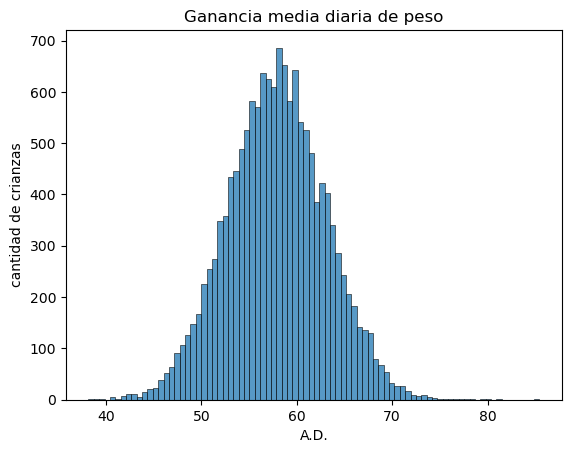

time: 578 ms (started: 2023-06-26 19:17:59 -03:00)


In [9]:
#Gráfico 1
#Histograma de Ganancia media diaria de peso#
ax=sns.histplot(data=df, x='A.D.')
ax.set(title='Ganancia media diaria de peso', ylabel='cantidad de crianzas');

In [12]:
df['A.D.'].mean()


57.87417275639253

time: 0 ns (started: 2023-06-26 19:21:34 -03:00)


La **ganancia media diaria de peso** es una medida que permite comparar resultados entre granjas y además permite ver la evolución de los resultados globales de la empresa a lo largo del tiempo. A mayor valor, mejor será el resultado. El valor medio es de **57.87** gramos de peso ganados promedio por día.

### A.D. por año

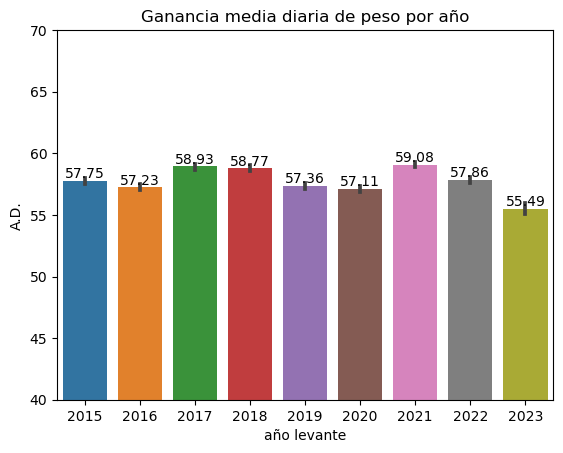

time: 515 ms (started: 2023-06-26 20:12:53 -03:00)


In [33]:
# Gráfico 2
ax=sns.barplot(data=df, x='año levante',y='A.D.') 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia media diaria de peso por año');

Se observa que las ganancias de peso de los años 2017 y 2021 fueron superiores al resto de los años analizados. 

### A.D. por estación del año